# Predicting Disease Progression Using Linear Regression    
This notebook uses the UCI “Diabetes” dataset to predict a quantitative measure of disease progression one year after baseline.    
It will cover:    
- Data loading & exploration    
- Preprocessing    
- Model training (Linear Regression)    
- Evaluation (MSE)    
- Visualization of predictions    

In [2]:
# Load libraries  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.datasets import load_diabetes  
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error  
  
# Load built-in diabetes dataset  
diabetes = load_diabetes(as_frame=True)  
X = diabetes.data  
y = diabetes.target  
  
print(X.head())  

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761

c:\Users\smyou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\smyou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\smyou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\smyou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

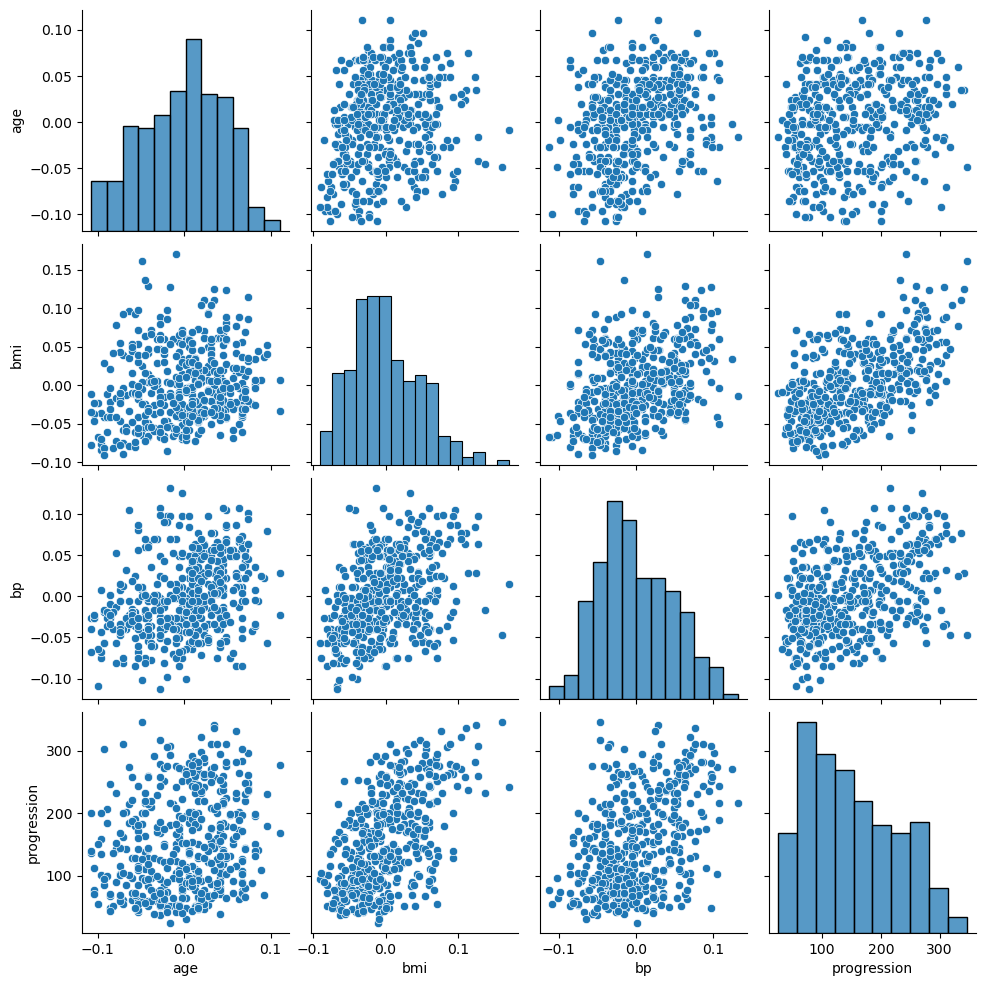

In [3]:
# Exploratory Data Analysis

## Quick summary stats  
print(X.describe())  
  
## Pairplot for first 3 features vs target  
sns.pairplot(pd.concat([X[['age', 'bmi', 'bp']], y.rename('progression')], axis=1))  
plt.show()  

In [4]:
#Preprocessing and Split

# Check that there are no missing values in this dataset  
print(X.isna().sum())  
  
# Train/test split  
X_train, X_test, y_train, y_test = train_test_split(  
    X, y, test_size=0.2, random_state=42)  
print('Train size:', X_train.shape, 'Test size:', X_test.shape)  

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64
Train size: (353, 10) Test size: (89, 10)


In [5]:
# Model Training 
lr = LinearRegression()  
lr.fit(X_train, y_train)  

LinearRegression()

In [6]:
# Model Evaluation
# Predict and compute MSE  
y_pred = lr.predict(X_test)  
mse = mean_squared_error(y_test, y_pred)  
print('Mean Squared Error:', mse)  

Mean Squared Error: 2900.193628493482


In [7]:
#Interpret MSE in context
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 53.85344583676593


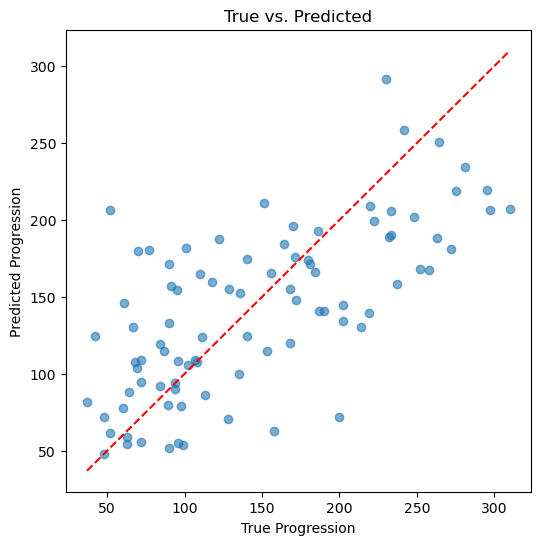

In [8]:
# Visualization of Fit
plt.figure(figsize=(6,6))  
plt.scatter(y_test, y_pred, alpha=0.6)  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel('True Progression')  
plt.ylabel('Predicted Progression')  
plt.title('True vs. Predicted')  
plt.show()  